In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from mahakala.grmhd.athenak import AthenakFluidModel
from mahakala.images import make_image 

# set fluid model and create image using helper function

In [3]:
grmhd_fname = 'torus.mhd_w_bcc.01980.athdf'
bhspin = 0.9
fluid_gamma = 13./9

fluid_model = AthenakFluidModel(grmhd_fname, bhspin, fluid_gamma=fluid_gamma)

100%|██████████| 456/456 [00:00<00:00, 502.92it/s]


In [6]:
from mahakala.constants import Msun

image_kwargs = dict(
    # camera location
    camera_inclination=60,
    camera_distance=1000,

    # thermodynamics and scaling parameters
    mass_scale=1.e26,
    M_bh=6.2e9*Msun,
    r_high=40,

    # image properties
    observing_frequency=230.e9,
    fov=20,
    resolution=320,

    # chunking
    max_chunk_bytes=16.e9
)

I_nu = make_image(fluid_model, **image_kwargs)

20000 102400


100%|██████████| 456/456 [00:01<00:00, 338.40it/s]


# plot

In [8]:
def colorbar(im):
    # add colorbar to the right of the plot that is the same height
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(im.axes)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return im.axes.figure.colorbar(im, cax=cax)

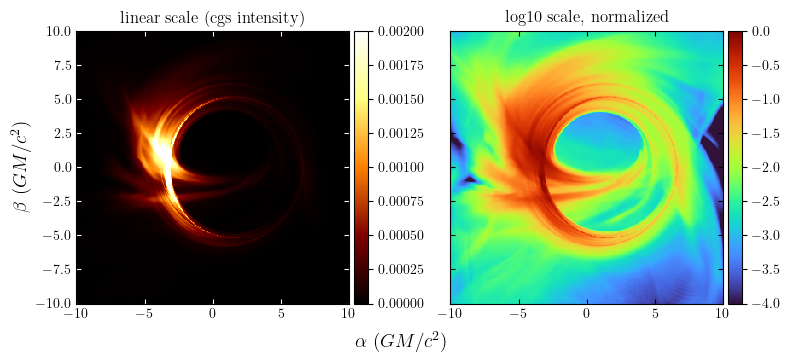

In [10]:
pdata = I_nu.copy().T

fig = plt.figure(figsize=(8, 4), facecolor='w')

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

kwargs = dict(extent=[-image_kwargs['fov']/2, image_kwargs['fov']/2, -image_kwargs['fov']/2, image_kwargs['fov']/2], aspect='equal', 
              interpolation='none', origin='lower', rasterized=True)

# show image in linear scale
im1 = ax1.imshow(pdata, vmin=0, vmax=0.002, cmap='afmhot', **kwargs)
colorbar(im1)
ax1.set_title('linear scale (cgs intensity)')
ax1.tick_params(direction='in', top=True, right=True, color='w')

# show image in log10 scale
pdata = pdata / np.max(pdata)
im2 = ax2.imshow(np.log10(pdata), vmin=-4, vmax=0., cmap='turbo', **kwargs)
colorbar(im2)
ax2.set_yticklabels([])
ax2.set_title('log10 scale, normalized')
ax2.tick_params(direction='in', top=True, right=True)

# add labels
fig.text(0.45, 0.05, r'$\alpha\ (GM/c^2)$', fontsize=14)
ax1.set_ylabel(r'$\beta\ (GM/c^2)$', fontsize=14)

plt.tight_layout()
plt.savefig('example_grmhd.pdf', bbox_inches='tight')